# SIS1: Classification using Perceptron and Multilayer Perceptron (MLP)

- Student 1: Balym Sekenova ID: 23B031433
- Student 2: Nursultan Zhantuar ID: 23B030356
- Student 3: Maxim Abakarov ID: 23B031182
- Student 4: Balzhan Batyrbaeva ID: 23B031245

## Environment Setup

### Library Installation

Uncomment and run the following line if you don't have the required packages installed. Not necessary to run when using Google Colaboratory

In [1]:
# %pip install numpy pandas scikit-learn matplotlib

### Library Import

In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.datasets import make_moons

## Dataset
In this work, the Moons dataset from scikit-learn was used. The dataset  onsists of two interleaving half-circles and is not linearly separable.
- Total samples: 1000
- Training set: 800 samples
- Test set: 200 samples
- Noise level: 0.2

### Load and Split the Dataset

In [3]:
# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (800, 2)
Test size: (200, 2)


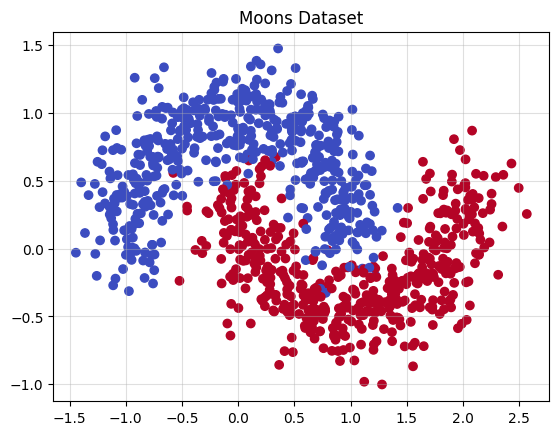

In [4]:
# visualize the moons dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.grid(alpha=0.4)
plt.title("Moons Dataset")
plt.show()

## Task 3 - Experiments with different MLP configurations

### Evaluation Function

In [5]:
model_classes = dict() # dictionary to store ONLY the model instances

In [6]:
def evaluate_model(model, name):
    """
    Evaluate a given model and print its performance metrics

    Calculates
    - accuracy
    - precision
    - recall
    - f1-score
    - training time
    """
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    train_time = end - start

    model_classes[name] = model # store the model instance

    metrics = {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Training time": train_time
    }

    print("Model:", name)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("Training time:", train_time)

    return metrics

### Experiment with Perceptron and Arbitrary configurations
- Perceptron
- Multi-layer perceptrons with different configurations
  - 2 - 4 - 1
  - 2 - 8 - 1
  - 2 - 16 - 1
  - 2 - 32 - 1
  - 2 - 64 - 1
  - 2 - 8 - 8 - 8 - 1

In [7]:
perceptron = Perceptron()
_ = evaluate_model(perceptron, "Perceptron")

Model: Perceptron
Accuracy: 0.825
Precision: 0.7559055118110236
Recall: 0.96
F1: 0.8458149779735683
Training time: 0.023361682891845703


In [8]:
# dictionary to store MLP names with their metrics
models = dict()

In [9]:
# dicttionay of all MLP configurations for this experiment
mlps = {
    "MLP (2-4-1)" : (4,),
    "MLP (2-8-1)" : (8,),
    "MLP (2-16-1)" : (16,),
    "MLP (2-32-1)" : (32,),
    "MLP (2-64-1)" : (64,),
    "MLP (2-8-8-8-1)" : (8,8,8)
}

In [10]:
for mlp, layers in mlps.items():
    model = MLPClassifier(hidden_layer_sizes=layers, max_iter=2000, random_state=42)
    models[mlp] = evaluate_model(model, mlp)
    print()

Model: MLP (2-4-1)
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1: 0.86
Training time: 1.3805432319641113

Model: MLP (2-8-1)
Accuracy: 0.89
Precision: 0.875
Recall: 0.91
F1: 0.8921568627450981
Training time: 1.2547037601470947

Model: MLP (2-16-1)
Accuracy: 0.975
Precision: 0.9702970297029703
Recall: 0.98
F1: 0.9751243781094527
Training time: 4.042307615280151

Model: MLP (2-32-1)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
Training time: 4.8604021072387695

Model: MLP (2-64-1)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
Training time: 5.575883388519287

Model: MLP (2-8-8-8-1)
Accuracy: 0.985
Precision: 0.98989898989899
Recall: 0.98
F1: 0.9849246231155779
Training time: 3.293891191482544



In [11]:
pd.DataFrame(models).T

,Model,Accuracy,Precision,Recall,F1,Training time
MLP (2-4-1),MLP (2-4-1),0.86,0.86,0.86,0.86,1.380543
MLP (2-8-1),MLP (2-8-1),0.89,0.875,0.91,0.892157,1.254704
MLP (2-16-1),MLP (2-16-1),0.975,0.970297,0.98,0.975124,4.042308
MLP (2-32-1),MLP (2-32-1),0.98,0.98,0.98,0.98,4.860402
MLP (2-64-1),MLP (2-64-1),0.98,0.98,0.98,0.98,5.575883
MLP (2-8-8-8-1),MLP (2-8-8-8-1),0.985,0.989899,0.98,0.984925,3.293891


### Experiments with Models of Different Width

In [12]:
w_models = dict() # store metrics for width experiment
w_mlps = {
    "MLP (2-4-1)" : (4,),
    "MLP (2-8-1)" : (8,),
    "MLP (2-16-1)" : (16,),
    "MLP (2-32-1)" : (32,),
    "MLP (2-64-1)" : (64,)
} # dict of all mlp configurations for width experiment

In [13]:
for mlp, layers in w_mlps.items():
    model = MLPClassifier(hidden_layer_sizes=layers, max_iter=2000, random_state=42)
    w_models[mlp] = evaluate_model(model, mlp)
    print()

Model: MLP (2-4-1)
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1: 0.86
Training time: 1.1820769309997559

Model: MLP (2-8-1)
Accuracy: 0.89
Precision: 0.875
Recall: 0.91
F1: 0.8921568627450981
Training time: 1.4875802993774414

Model: MLP (2-16-1)
Accuracy: 0.975
Precision: 0.9702970297029703
Recall: 0.98
F1: 0.9751243781094527
Training time: 3.2671988010406494

Model: MLP (2-32-1)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
Training time: 1.3891081809997559

Model: MLP (2-64-1)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
Training time: 1.5017759799957275



In [14]:
w_models_df = pd.DataFrame(w_models).T
w_models_df

,Model,Accuracy,Precision,Recall,F1,Training time
MLP (2-4-1),MLP (2-4-1),0.86,0.86,0.86,0.86,1.182077
MLP (2-8-1),MLP (2-8-1),0.89,0.875,0.91,0.892157,1.48758
MLP (2-16-1),MLP (2-16-1),0.975,0.970297,0.98,0.975124,3.267199
MLP (2-32-1),MLP (2-32-1),0.98,0.98,0.98,0.98,1.389108
MLP (2-64-1),MLP (2-64-1),0.98,0.98,0.98,0.98,1.501776


### Experiments with Models of Different Depth
In this task, we analyzed MLPs with different number of layers (with 8 neurons per layer): from 1 layer to 4 layers


In [15]:
d_models = dict() # store metrics for the depth experiment

In [16]:
#depth experiment
depths = [1, 2, 3, 4] # depth configurations

for d in depths:
    suffix = "-8" * d
    layers = tuple([8]*d)
    model = MLPClassifier(hidden_layer_sizes=layers,
                          activation="relu",
                          max_iter=2000,
                          random_state=42)
    d_models[f"MLP (2{suffix}-1)"] = evaluate_model(model, f"MLP (2{suffix}-1)")
    print("\n")

Model: MLP (2-8-1)
Accuracy: 0.89
Precision: 0.875
Recall: 0.91
F1: 0.8921568627450981
Training time: 0.5845677852630615


Model: MLP (2-8-8-1)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
Training time: 1.233962059020996


Model: MLP (2-8-8-8-1)
Accuracy: 0.985
Precision: 0.98989898989899
Recall: 0.98
F1: 0.9849246231155779
Training time: 1.2296226024627686


Model: MLP (2-8-8-8-8-1)
Accuracy: 0.98
Precision: 1.0
Recall: 0.96
F1: 0.9795918367346939
Training time: 0.9629712104797363




In [17]:
d_models_df = pd.DataFrame(d_models).T
d_models_df

,Model,Accuracy,Precision,Recall,F1,Training time
MLP (2-8-1),MLP (2-8-1),0.89,0.875,0.91,0.892157,0.584568
MLP (2-8-8-1),MLP (2-8-8-1),0.98,0.98,0.98,0.98,1.233962
MLP (2-8-8-8-1),MLP (2-8-8-8-1),0.985,0.989899,0.98,0.984925,1.229623
MLP (2-8-8-8-8-1),MLP (2-8-8-8-8-1),0.98,1.0,0.96,0.979592,0.962971


## Task 4 - Decision Boundary
In this task, we created decision boundary plots for
- Perceptron
- MLP with the best accuracy
- MLP with the worst accuracy

### Find the Best and Worst Models

First, collect all models into 1 dataframe

In [18]:
all_models = {**w_models, **d_models}
all_models_df = pd.DataFrame(all_models).T
all_models_df

,Model,Accuracy,Precision,Recall,F1,Training time
MLP (2-4-1),MLP (2-4-1),0.86,0.86,0.86,0.86,1.182077
MLP (2-8-1),MLP (2-8-1),0.89,0.875,0.91,0.892157,0.584568
MLP (2-16-1),MLP (2-16-1),0.975,0.970297,0.98,0.975124,3.267199
MLP (2-32-1),MLP (2-32-1),0.98,0.98,0.98,0.98,1.389108
MLP (2-64-1),MLP (2-64-1),0.98,0.98,0.98,0.98,1.501776
MLP (2-8-8-1),MLP (2-8-8-1),0.98,0.98,0.98,0.98,1.233962
MLP (2-8-8-8-1),MLP (2-8-8-8-1),0.985,0.989899,0.98,0.984925,1.229623
MLP (2-8-8-8-8-1),MLP (2-8-8-8-8-1),0.98,1.0,0.96,0.979592,0.962971


Then, sort them by accuracy

In [19]:
sorted_models = all_models_df.sort_values(by="Accuracy", ascending=False)
sorted_models

,Model,Accuracy,Precision,Recall,F1,Training time
MLP (2-8-8-8-1),MLP (2-8-8-8-1),0.985,0.989899,0.98,0.984925,1.229623
MLP (2-32-1),MLP (2-32-1),0.98,0.98,0.98,0.98,1.389108
MLP (2-64-1),MLP (2-64-1),0.98,0.98,0.98,0.98,1.501776
MLP (2-8-8-1),MLP (2-8-8-1),0.98,0.98,0.98,0.98,1.233962
MLP (2-8-8-8-8-1),MLP (2-8-8-8-8-1),0.98,1.0,0.96,0.979592,0.962971
MLP (2-16-1),MLP (2-16-1),0.975,0.970297,0.98,0.975124,3.267199
MLP (2-8-1),MLP (2-8-1),0.89,0.875,0.91,0.892157,0.584568
MLP (2-4-1),MLP (2-4-1),0.86,0.86,0.86,0.86,1.182077


Get the best and the worst models by accuracy

In [20]:
best_model_name = sorted_models.index[0]
worst_model_name = sorted_models.index[-1]
print("Best model by accuracy:", best_model_name)
print("Worst model by accuracy:", worst_model_name)

Best model by accuracy: MLP (2-8-8-8-1)
Worst model by accuracy: MLP (2-4-1)


### Plot the Decision Boundaries

In [21]:
def plot_decision_boundary(model, X, y, title):
    # x and y axis ranges for the plot
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    h = 0.005

    # generate meshgrid
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # predict over meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot filled contour - bg
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plot decision boundary
    plt.contour(
        xx, yy, Z,
        levels=[0.5],        # boundary between classes
        colors="black",
        linewidths=2
    )

    # plot data points
    plt.scatter(
        X[:, 0], X[:, 1],
        c=y,
        cmap=plt.cm.coolwarm,
        s=50,
        edgecolors="k"
    )

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(alpha=0.4)
    plt.show()

#### Perceptron

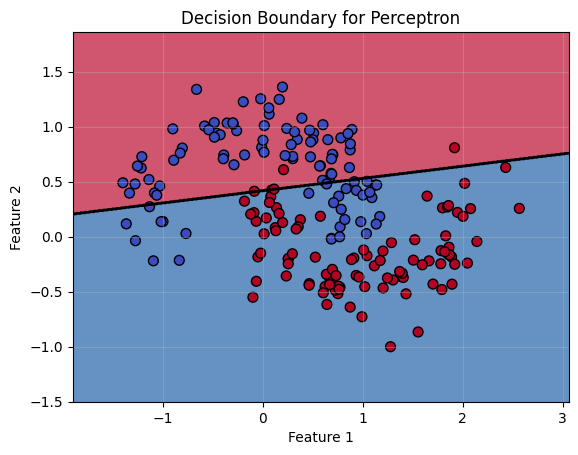

In [25]:
plot_decision_boundary(
    model=perceptron,
    X=X_test,
    y=y_test,
    title=f"Decision Boundary for Perceptron"
)

#### Best model

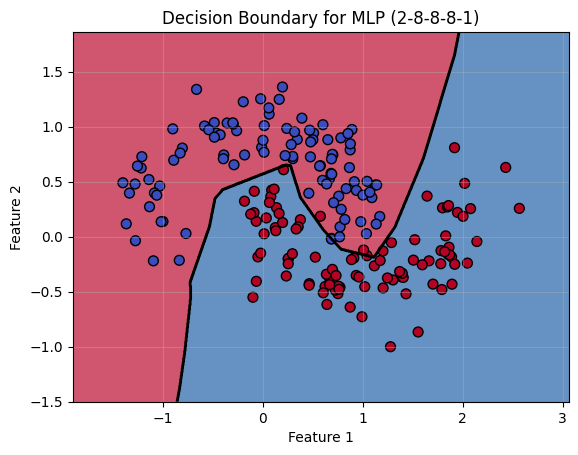

In [26]:
plot_decision_boundary(
    model=model_classes[best_model_name],
    X=X_test,
    y=y_test,
    title=f"Decision Boundary for {best_model_name}"
)

#### Worst model

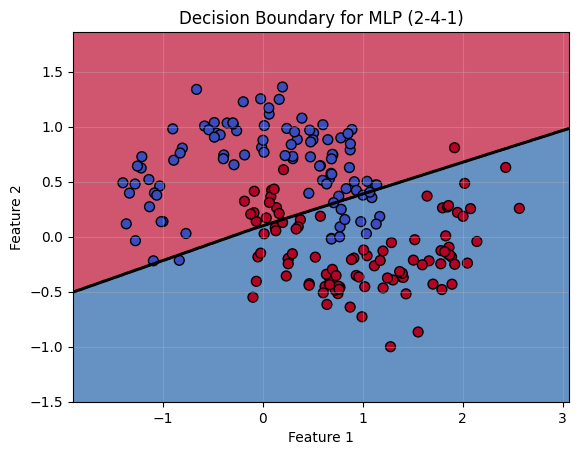

In [27]:
plot_decision_boundary(
    model=model_classes[worst_model_name],
    X=X_test,
    y=y_test,
    title=f"Decision Boundary for {worst_model_name}"
)